# Chapter4 신경망 학습

- 학습 : 훈련 데이터로부터 가중치의 최적값을 자동으로 획득하는 것
- 손실 함수 : 신경망이 학습할 수 있도록 해주는 **지표**
- 손실 함수의 결과값을 가장 작게 만드는 가중치를 찾는 것이 학습의 목표

## 4.1 데이터에서 학습한다

- 데이터에서 학습한다 = 가중치의 값을 데이터를 보고 자동으로 결정한다
- 이번 장에서는 신경망 학습과 MNIST 데이터셋의 손글씨 숫자를 학습하는 코드를 구현한다

- 선형분리가 가능한 문제라면, 데이터로부터 자동으로 학습 가능함 - 유한 번의 학습을 통해 풀 수 있다는 사실 증명 (퍼셉트론 수렴 정리)
- 비선형 분리 문제는 자동으로 학습할 수 없음

### 4.1.1 데이터 주도 학습

- 기계학습은 데이터가 생명이자 중심. 사람의 경험과 직관을 단서로 시행착오를 반복하는 것과 달리 기계학습은 사람의 개입을 최소화하고 수집한 데이터로부터 패턴을 찾으려 시도한다.

- 사람이 인식하기는 쉽지만, 그 패턴(규칙성)을 찾아내기는 쉽지 않음

- 데이터 활용 방법의 하나 : 이미지에서 특징 추출하고 그 특징의 패턴을 ML기술로 학습

- 이미지의 특징은 보통 벡터로 기술, CV분야에서는 SIFT, SURF, HOG 등의 특징 사용

- 이런 특징을 사용하여 이미지를 벡터로 변환, 지도학습의 대표 분류 기법인 SVM, KNN등으로 학습 가능

- 규칙 찾아내는 역할은 기계가 담당하나, 문제에 적합한 특징 찾아내는 것은 사람이 해야한다.

- 문제에 적합한 특징 사용하지 않으면(설계하지 않으면) 좋은 결과를 얻을 수 없음

- 딥러닝은 이미지를 '있는 그대로' 학습 (중요한 특징까지 스스로 학습)

- 딥러닝을 '종단간 기계학습(end-to-end machine learning)이라고도 함. 

  => 데이터(입력)에서 목표한 결과(출력)를 개입없이 얻는다는 뜻

### 4.1.2 훈련 데이터와 시험 데이터

![이미지](https://wikidocs.net/images/page/31947/%EB%8D%B0%EC%9D%B4%ED%84%B0.PNG)

- 훈련 데이터를 학습에 사용, 추론에 테스트 데이터 사용

- 훈련-시험 데이터를 나누는 이유 : 범용능력을 평가하기 위해

  범용능력 : 아직 보지 못한 데이터로도 문제를 올바르게 풀어내는 능력. 데이터셋 하나로만 매개변수의 학습 및 평가를 수행하면 올바른 평가 될 수 없음

- 오버피팅(overfitting) : 한 데이터셋에만 지나치게 과적화된 상태

## 4.2 손실 함수

손실함수 : 신경망이 최적의 매개변수 값을 탐색하는 기준 (지표)

임의의 함수를 사용할 수 있지만 일반적으로 오차제곱합과 교차 엔트로피 오차 사용
손실함수는 신경망 성능의 '나쁨'을 나타내는 지표

### 4.2.1 오차제곱합

![이미지](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fk.kakaocdn.net%2Fdn%2FdCDpqv%2Fbtq102Ja1sN%2FadDK0g6c4q8nutIvh9bnyk%2Fimg.jpg)


In [1]:
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0] # 라벨 0,1,2 순의 확률값들. 2에 해당하는 원소값이 1이므로 정답은 2
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0] # 이렇게 한 원소만 1로 하고 그 외에는 0으로 나타내는 표기를 원-핫 인코딩이라 함

In [2]:
import numpy as np
def sum_squares_error(y, t):
    return 0.5 * np.sum((y-t)**2)

In [3]:
sum_squares_error(np.array(y), np.array(t))

0.09750000000000003

In [4]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
sum_squares_error(np.array(y), np.array(t))

0.5975

=> 손실 함수 쪽 출력이 작으면 정답 레이블과의 오차도 작다 => 오차제곱합이 더 작은 것이 정답에 더 가깝다

### 4.2.2 교차 엔트로피 오차

![이미지](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fk.kakaocdn.net%2Fdn%2FNAFf7%2Fbtq1WKpHPxE%2FEuafGjZOGD0ddh7yHoWybK%2Fimg.jpg)

- log는 밑이 e인 자연로그
- Yk는 신경망의 출력
- tk는 정답 레이블 ( tk는 정답에 해당하는 인덱스만 1인 원-핫 인코딩)


실질적으로 정답일 때의 추정의 자연로그 계산 (정답이 아닌 것은 tk가 0 이므로 결과영향X)

교차 엔트로피 오차는 정답일 때의 출력이 전체 값을 정하게 됨

자연로그 y=logx의 그래프 : 정답출력이 커질수록 0에 다가가다가, 그 출력이 1일 때 0이 됨
![iamge](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fk.kakaocdn.net%2Fdn%2FchMSBp%2Fbtq11yODoRj%2Fsn4Z8DyXUcZpbkELx4lQkk%2Fimg.png)

In [5]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y+delta)) 

- 왜 -np.sum??? = 확률값이면 0.1, 0.6등등 소수인데 이게 로그안에 들어가면 마이너스가 밖으로 나옴. 그래서 앞에 - 붙여준겨
- t를 곱해주는 이유는?? => t는 원-핫 인코딩이 되어있는 상태. np.log(y+delta)를 거치고 나온 넘파이 배열과 t를 곱하면,  t는 정답값을 제외하고 나머지는 다 0이기 때문에 정답에 해당하는 로그값만 남는다 

- np.log 계산할 때 아주 작은 값 delta를 더해준 이유는 np.log()에 0을 입력하면 -int가 되어 계산이 안되므로
- 0이 되지 않도록 아주 작은 값을 더해주어, 마이너스 무한대가 발생하지 않도록 한 것이다.

In [6]:
y = np.array([0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0])
t = np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])
cross_entropy_error(y, t)

0.510825457099338

In [7]:
y = np.array([0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0])
cross_entropy_error(y, t)

2.302584092994546

=> 교차 엔트로피 오차도 마찬가지로 출력이 작을수록 정답에 가깝다

### 4.2.3 미니배치 학습

- 기계학습 문제는 훈련 데이터를 사용해 학습한다 

  => 훈련 데이터에 대한 손실 함수의 값을 구하고, 그 값을 최대한 줄여주는 매개변수를 찾아낸다

  => 모든 훈련 데이터를 대상으로 손실 함수 값을 구해야 한다

  ex) 훈련 데이터가 100개면 100개의 손실 함수 값들의 합을 지표로 삼는다

<br/>

- ![이미지](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fk.kakaocdn.net%2Fdn%2FckGuuv%2Fbtq1XlQuy6b%2F7VMOsKXz7Igni2KtvHVFf1%2Fimg.jpg)

- 복잡해 보이지만 앞에서의 손실함수 값들을 다 더하고 전체 데이터 개수로 나누어 '평균 손실 함수'를 구한 것이다

- 마지막에 N(데이터의 갯수)으로 나누어 '평균 손실 함수' 구함 ==> 훈련 데이터 개수와 관계없이 언제든 통일된 지표 얻을 수 있다

- MNIST의 경우 - 훈련 데이터 60000개. 모든 데이터를 대상으로 손실 함수의 합을 구하려면 시간이 걸린다. 빅데이터 수준이 되면 어마어마한 시간이 걸리는건 마찬가지.

  => 빅데이터를 대상으로 일일이 손실함수 계산하는 것은 현실적이지 않음
<br/>

- 그렇기에 훈련 데이터에서 일부만 골라 학습을 수행하며 데이터의 일부를 **미니배치**라고 한다

  ex) 60000장 훈련 데이터에서 100장을 무작위로 뽑아 100장씩 학습 = 미니배치 학습

  => 미니 배치 : 데이터 일부를 추려 전체의 '근사치'로 이용하는 것



In [8]:
!git clone https://github.com/WegraLee/deep-learning-from-scratch.git

Cloning into 'deep-learning-from-scratch'...
remote: Enumerating objects: 826, done.
remote: Total 826 (delta 0), reused 0 (delta 0), pack-reused 826
Receiving objects: 100% (826/826), 52.21 MiB | 39.54 MiB/s, done.
Resolving deltas: 100% (477/477), done.


In [9]:
%cd /content/deep-learning-from-scratch/dataset

/content/deep-learning-from-scratch/dataset


In [10]:
import sys, os
sys.path.append(os.pardir)
import numpy as np 
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)


Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!


In [11]:
x_train.shape, t_train.shape

((60000, 784), (60000, 10))

- 이 훈련데이터에서 무작위로 10장만 뽑으려면 어떻게 해야할까??

  => np.random.choice()

  ㄴ 지정한 범위의 수 중에서 무작위로 원하는 개수만 꺼낼 수 있음

  ㄴ 무작위로 선택한 인덱스를 사용 / 손실함수도 미니배치로 계산

In [12]:
train_size = x_train.shape[0] # x_train.shape[0] = 60000
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size) # np.random.choice(60000, 10) : 0 이상 60000미만의 수 중에서 무작위로 10개를 골라낸다.
x_batch = x_train[batch_mask] # 이 함수가 출력한 배열을 미니배치로 뽑아낼 데이터의 인덱스로 사용
t_batch = t_train[batch_mask]

- np.random.choice 사용시 뽑은 인덱스는 범위내에서 제거하는가??

=> 복원 / 비복원 추출 기능 파라미터가 있음(replace = True/False)

[[Python numpy] np.random.choice() 메소드로 임의표본 추출하기 (무작위, 확률 샘플링)](https://rfriend.tistory.com/548)

In [13]:
np.random.choice(60000, 10)

array([53582,  7143, 42699, 17939, 12545, 19536, 45142, 13450, 40350,
       56637])

In [14]:
t_batch

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

- 미니배치의 손실 함수도 일부 표본 데이터로 전체와 비슷하게 계측한다. 

=> 전체 훈련 데이터의 대표로서 무작위로 선택한 작은 덩어리(미니배치)를 사용하는 것이다

### 4.2.4 (배치용) 교차 엔트로피 오차 구현하기

- 미니배치를 사용할 경우 교차 엔트로피 오차는 어떻게 구현할까??

In [15]:
def cross_entropy_error(y,t): 
    if y.ndim == 1: 
        t = t.reshape(1, t.size) 
        y = y.reshape(1, y.size) # (10,) =>  (1, 10) / 1차원에서 2차원으로 변환 
       
        batch_size = y.shape[0] # y.shape[0] = 1
        return -np.sum(t * np.log(y + 1e-7)) / batch_size

- 왜 reshape해서 (10,)에서 (1, 10)으로, 차원을 늘려줄까?? 
   
   => batch_size를 가진 데이터가 들어가면 ( batch_size, labels 개수 ) 이런 2차원 형태를 가진다
     
     ㄴ 2차원의 데이터가 들어오면 / if문이 작동하지 않고 넘어가서 / 함수내 batch_size에는 우리가 지정한 batch_size가 y.shape[0]에 그대로 들어간다
    
     ㄴ 하지만 1차원의 데이터의 경우 원래는 batch_size가 존재하지 않지만 /  batch_size가 1이기에 reshape를 통해서 2차원으로 늘려주고
    
     ㄴ 함수 내 batch_size에 1이 들어가도록 해줘서 배치사이즈가 있든 없든 모든 데이터를 처리할 수 있도록 만들었다

> 위 코드는 데이터가 하나인 경우와 데이터가 배치로 묶여 입력될 경우 모두를 처리할 수 있도록 구현 되었다.
- y는 신경망의 출력 / t는 정답 레이블
- y가 1차원이라면 데이터 하나당 교차 엔트로피 오차를 구하는 경우는 reshape로 데이터 형태를 바꿔준다
- 배치의 크기로 나눠 정규화하고 이미지 1장당 평균 교차 엔트로피 오차를 계산한다

In [16]:
a = np.arange(0,1,0.1)
b = np.arange(0,1,0.1)
ab = np.stack([a,b], axis=0)
ab.shape, ab.ndim

((2, 10), 2)

In [3]:
y = np.array([0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0])
# y = np.array([0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0])
t = np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [18]:
y.shape, y.reshape(1, y.size).shape

((10,), (1, 10))

In [19]:
cross_entropy_error(y,t)

0.510825457099338

In [12]:
# 정답 레이블이 원-핫 인코딩이 아니라 숫자 레이블로 주어졌을 경우
def cross_entropy_error(y,t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    
    batch_size = y.shape[0]
    # print(y[np.arange(batch_size), t])
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

- -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size <= 이부분 어떤 형태로 나오는지 자세하게 알아야 할듯??

In [21]:
batch_size =  5
np.arange(batch_size) 

array([0, 1, 2, 3, 4])

In [ ]:
t = np.array([2,7,0,9,4])
y = np.array([2,7,1,1,1])
[np.arange(batch_size), t]

In [ ]:
cross_entropy_error(y,t)

- 원-핫 인코딩일 때 t가 0인 원소는 교차 엔트로피 오차도 0이므로, 그 계산은 무시해도 좋다는 것이 핵심

- 정답에 해당하는 신경망의 출력만으로 교차 엔트로피 오차 계산가능하다

---

- 원-핫 인코딩 시 t * np.log(y) 부분을 **숫자 레이블의 경우에는 np.log(y[np.arange(batch_size), t])로 구현**

- np.arange(batch_size)는 0부터 batch_size -1까지 배열을 생성한다 

  => batch_size가 5이면 np.arange(batch_size) = [0,1,2,3,4]

- t = [2,7,0,9,4] 이면 y[np.arange(batch_size), t]는 각 데이터의 정답 레이블에 해당하는 신경망의 출력을 추출한다

 => 여기 예제에서 y[np.arange(batch_size), t]는 [y[0,2], y[1,7], y[2,0], y[3,9], y[4,4]]인 넘파이 배열 생성

### 4.2.5 왜 손실 함수를 설정하는가??

> 정확도란 지표를 두고 손실 함수를 쓰는 이유는???

- '미분'의 역할에 주목하면 정확도 대신 손실함수 쓰는 이유를 알 수 있다

- 신경망 학습에서는 최적의 매개변수(가중치,편향) 탐색 시 손실 함수 값 최소화하는 매개변수 값을 찾는다

- 이때 매개변수의 미분(기울기)을 계산하고, 그 값을 단서로 매개변수의 값을 서서히 갱신하는 과정 반복한다

- 미분 값의 양,음에 따라 반대방향으로 매개변수 변화시켜 손실함수 값 줄일 수 있다

- 미분 값이 0이 되면 가중치 매개변수의 갱신이 멈추게 된다

- 신경망을 학습할 때 정확도를 지표로 삼으면 안되는데, 정확도를 지표로 삼으면 매개변수의 미분이 대부분의 장소에서 0이 되기 때문이다




- 정확도는 매개변수의 미소한 변화에는 거의 반응을 보이지 않고, 반응이 있더라도 그 값이 불연속적으로 갑자기 변화한다

- 그래서 계단함수를 활성화함수로 사용하지 않는 것과 같은 이유이다

- 매개변수의 작은 변화가 주는 파장을 계단 함수가 말살하여 손실함수의 값에는 아무런 변화가 나타나지 않기 때문이다

<br/>

![이미지](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fk.kakaocdn.net%2Fdn%2Fspgrh%2Fbtq1WeRNLh3%2F2bQkh9s9Pq3k7QQ0XH0y8K%2Fimg.png)
ㄴ 계단함수는 대부분의 장소에서 기울기가 0이지만 시그모이드 함수의 기울기는 0이 아니다

> 시그모이드 함수의 미분은 출력과 곡선의 기울기가 연속적으로 변한다 = 어느 장소라도 미분이 0이 되지 않는다 => 이는 신경망 학습에서 중요한 성질로 기울기가 0이 되지 않기에 신경망이 올바르게 학습할 수 있다


## 4.3 수치 미분

### 4.3.1 미분

![이미지](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fk.kakaocdn.net%2Fdn%2FebWi25%2Fbtq10KicVzZ%2FuD4G2kLbpJEElk7gQ59zL0%2Fimg.jpg)

In [23]:
# 나쁜 구현 예

def numerical_diff(f,x):
    h = 1e-50
    return (f(x+h) - f(x)) / h

> 이 함수는 '함수 f와 함수 f에 넘길 인수 x' - 두 인수를 받는다. 그러나 개선해야 할 점이 2가지 있다

<br/>

1. h에는 가급적 작은 값 대입하고 싶어(h를 0에 무한히 가깝게) 1e-50 사용

  =>  이값을 쓸 경우 : 반올림 오차문제가 발생한다(작은값 생략) 
  
  ex) np.float32(1e-50) = 0.0

  개선 포인트 : 미세한 값으로 10e-4사용, 이 값을 사용시 좋은 결과를 얻는다고 알려짐


<br/>

2. f의 차분(임의 두 점에서의 함수 값들의 차이) 문제이다

   x + h와 x 사이의 함수 f의 차분을 계산하지만, 이 계산에는 애당초 오차가 있음을 주의해야한다

  '진정한 미분'은 x위치의 함수의 기울기(=접선)에 해당하지만 구현에서는 (x+h)와 x사이의 기울기이므로 엄밀히 일치하지는 않는다

  이 차이는 h를 무한히 0으로 좁히는게 불가능하여 생기는 한계이다


수치 미분에는 오차가 포함되는데 이 오차를 줄이기 위해 (x+h)와 (x-h)일 때의 함수f의 차분을 계산하는 방법을 쓰기도 한다 = 중심차분 or 중앙차분

In [24]:
def numerical_diff(f,x): # x에 대해 미분
    h = 1e-4 # 0.001
    return (f(x+h) - f(x-h)) / (2*h) # 위의 구현과 차이점에 주목할것!!

### 4.3.2 수치 미분의 예

2차함수 미분해보기 --> y = 0.01x^2 + 0.1x

In [25]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x,y)
plt.show()

In [27]:
# x=5, 10일 때의 함수의 미분
numerical_diff(function_1,5), numerical_diff(function_1,10)

(0.1999999999990898, 0.2999999999986347)

> 미분 값은 x에 대한 f(x)의 변화량 = 함수의 기울기

x가 5와 10일때 완벽한 미분은 0.2와 0.3 => 오차가 매우 적어 거의 같은 값이라고 할 수 있다

### 4.3.3 편미분 

- 추가 공부 필요할 듯

앞의 예와 달리 변수가 2개라는 것에 주의

f(x0, x1) = x0^2 + x1^2

> 변수가 여럿인 함수에 대한 미분을 **편미분**이라 한다

![이미지](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fk.kakaocdn.net%2Fdn%2FcSNsH1%2Fbtq1ZFH83qa%2Fj4bsNVGWu1kijCXoKEskK1%2Fimg.jpg)

In [28]:
def function_2(x):
    return x[0]**2 + x[1]**2
    # return np.sum(x**2)

편미분 풀어보기

문제1 : x0=3, x1=4일때, x0에 대한 편미분 af/ax0를 구하라

In [29]:
def function_tmp1(x0):
    return x0*x0 + 4.0**2.0

numerical_diff(function_tmp1, 3.0)

6.00000000000378

문제2 : x0 = 3, x1 = 4일때, x1에 대한 편미분 af/ax1을 구하라

In [30]:
def function_tmp2(x1):
    return 3.0**2.0 + x1*x1

numerical_diff(function_tmp2, 4.0)

7.999999999999119

> 편미분을 푸는 방법

- 변수가 하나인 함수를 정의하고 그 함수를 미분하는 형태로 구현하여 풀었다

- 편미분은 변수가 하나인 미분과 마찬가지로 특정 장소의 기울기를 구한다

 => 단, 여러 변수 중 목표 변수 하나에 초점을 맞추고 다른 변수는 값을 고정

## 4.4 기울기

> x0과 x1의 편미분을 동시에 계산하려면 어떻게 해야할까??

=> 기울기 : (af/ax0, af/ax1)처럼 모든 변수의 편미분을 벡터로 정리한 것

In [31]:
def numerical_gradient(f,x):
    h = 1e-4
    grad = np.zeros_like(x) # x와 같은 0으로 된 배열 생성

    for idx in range(x.size):
        tmp_val = x[idx]
        # f(x+h) 계산
        x[idx] = tmp_val + h
        fxh1 = f(x)

        # f(x-h) 계산
        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원

    return grad

numerical_gradient(f,x) 함수의 인수인 f는 함수이고 x는 넘파이 배열이므로 x의 각 원소에 대해서 수치 미분을 구한다

In [32]:
np.array([3.0, 4.0]).size

2

In [33]:
numerical_gradient(function_2, np.array([3.0, 4.0]))

array([6., 8.])

- 기울기 그림을 통해 의미 알아보기 (코드는 github 참고)

![이미지](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fk.kakaocdn.net%2Fdn%2FuLN5K%2Fbtq1ZECyRMI%2FiOWb1SwbRpgu3DigLepLyK%2Fimg.png)

- 기울기의 결과에 마이너스를 붙인 벡터 그려보았다

- 그림의 기울기는 함수의 가장 낮은 장소(최솟값)를 가리킨다

- 최솟값에서 멀어질수록 화살표의 크기가 커진다

- 그림처럼 반드시 기울기는 가장 낮은 장소를 가리키는 것은 아니다

- **기울기가 가리키는 쪽은 각 장소에서 함수의 출력 값을 가장크게 줄이는 방향**이다 <= 중요한 포인트이므로 꼭 기억할 것!!

### 4.4.1 경사법(경사하강법)

> ❔ 최적의 매개변수(손실 함수가 최솟값이 되게 하는 매개변수 값들)를 학습 시에 찾아야 하는데 매개변수 공간은 아주 광범위해서 어디가 최솟값인지 찾기가 어렵다

  
  💡 기울기를 이용해 함수의 최솟값을 찾으려는 것이 경사법

<br/>

❗ 주의할 점 : 각 지점에서 함수의 값을 낮추는 방안을 제시하는 지표가 기울기라는 것이다

그러나 기울기가 가리키는 곳에 정말 함수의 최솟값이 있는지 보장할 수는 없다

실제로 복잡한 함수에서는 기울기가 가리키는 방향에 최솟값이 없는 경우가 대부분

ex) 함수가 극솟값, 최솟값, 안장점이 되는 장소에서는 기울기가 0

ㄴ 안장점은 방향에 따라 극댓값이 될 수 있고 극솟값이 될 수 있음

ㄴ 복잡한 함수는 평평한 곳으로 파고들면서 '고원'상태 (학습이 진행되지 않는상태)가 될 수 있음

<br/>

💡 현 위치에서 기울어진 방향으로 일정 거리만큼 이동하고 이동한 곳에서 기울기를 구하고, 또 기울어진 방향으로 나아가기를 반복하며 함수의 값을 점차 줄이는 것을 **경사법**이라고 한다


![이미지](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fk.kakaocdn.net%2Fdn%2FbP6FUT%2Fbtq127DDzmK%2FdqSvlXgScHa308CLIKHko0%2Fimg.jpg)

- 경사법 수식 : n기호(에타)는 갱신하는 양 

 = 학습률 : 한번의 학습으로 얼마나 학습할지, 매개변수 값을 얼마나 갱신할지 정하는 것

 학습률과 같은 매개변수를 하이퍼파라미터라고 한다 (사람이 직접 설정해야 하는 매개변수)

In [34]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x

    for i in range(step_num):
        grad = numerical_gradient(f,x)
        x -= lr * grad

    return x


- f는 최적화하려는 함수 / init_x는 초깃값  
- lr은 learning rate(학습률) / step_num은 경사법에 따른 반복 횟수 => 로지스틱회귀 등의 iter_max?
- 함수의 기울기는 numerical_gradient(f,x)로 구하고 / 그 기울기에 학습률을 곱한 값으로 갱신하는 처리를 step_num번 반복한다
 

경사법으로 f(x0, x1)= x0^2+x1^2의 최솟값 구하기

In [35]:
def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0]) 
gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)

array([-6.11110793e-10,  8.14814391e-10])

- 초깃값을 (-3.0, 4.0) 으로 설정한 후 경사법을 사용해 최솟값 탐색을 시작
- [-6.11110793e-10,  8.14814391e-10], 거의 (0,0)에 가까운 결과로 경사법으로 거의 정확한 결과를 얻은 것

![이미지](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fk.kakaocdn.net%2Fdn%2FlCGSD%2Fbtq11LVd9lU%2FmdkieKHef3KxriTCJCkU90%2Fimg.png)

In [36]:
%cd /content/deep-learning-from-scratch/ch04

/content/deep-learning-from-scratch/ch04


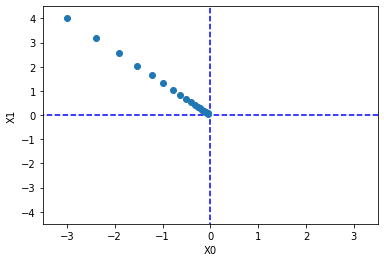

In [37]:
import numpy as np
import matplotlib.pylab as plt
from gradient_2d import numerical_gradient


def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)


def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])    

lr = 0.1
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()


> 학습률 적절히 설정하는 것이 중요

1. 학습률이 너무 클경우 최솟값을 찾지 못하고 큰 값으로 발산한다
2. 학습률이 너무 작을경우 거의 갱신되지 않은 채 반복종료될 수 있다

=> 학습률과 같은 매개변수를 하이퍼 파라미터라고 한다

   사람이 직접 설정하는 매개변수

   여러 후보 값 중에서 시험을 통해 가장 잘 학습하는 값을 찾는 과정 거쳐야 한다

In [ ]:
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=10.0, step_num=100)

In [ ]:
gradient_descent(function_2, init_x=init_x, lr=1e-10, step_num=100)

### 4.4.2 신경망에서의 기울기

ex) 형상이 2X3, 가중치가 W, 손실함수가 L인 신경망 (경사는 aL/aW)

![이미지](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fk.kakaocdn.net%2Fdn%2FCCjLZ%2Fbtq11zm5BHJ%2FKtmD834pRokDdmn7GX6E1K%2Fimg.jpg)

aL/aW의 각 원소는 각각의 원소에 대한 편미분

여기서 중요한 점은 aL/aW의 형상은 W와 같다는 것이다.

In [40]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient


class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3) # 정규분포로 초기화

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss

# x = np.array([0.6, 0.9])
# t = np.array([0, 0, 1])

# net = simpleNet()

# f = lambda w: net.loss(x, t)
# dW = numerical_gradient(f, net.W)

# print(dW)

> simpleNet 클래스

- 형상이 2X3인 가중치 매개변수 하나를 인스턴스 변수로 가짐
- 메서드 : 예측수행(predict), 손실함수계산(loss)
- 인수 x는 입력데이터, t는 정답레이블

In [41]:
net = simpleNet()
net.W

array([[ 3.0727667 , -0.44964474, -0.12648355],
       [ 0.41320474,  1.65401221, -1.08429091]])

In [42]:
x = np.array([0.6, 0.9])
p = net.predict(x)
p

array([ 2.21554428,  1.21882414, -1.05175194])

In [43]:
np.argmax(p)

0

In [44]:
t = np.array([0,0,1])
net.loss(x,t)

3.6088925573864237

- 기울기 구하기

In [45]:
def f(W): # net.W를 인수로 받아 손실 함수를 계산하는 새로운 함수 f
    return net.loss(x,t)

dW = numerical_gradient(f, net.W) # numerical_gradient(f,x)의 인수f는 함수 / x는 함수 f의 인수 
dW

array([[ 0.42637786,  0.15737096, -0.58374881],
       [ 0.63956678,  0.23605643, -0.87562322]])

dW는 numerical_gradient(f, net.W)의 결과로 2x3 2차원배열.

첫번째 기울기는 w11을 h만큼 늘리면 손실 함수의 값은 0.25h만큼 증가한다는 의미

마지막 기울기는 w23을 h만큼 늘리면 손실 함수의 값은 0.6만큼 감소

=> w23은 양의 방향으로 / w11은 음의 방향으로 갱신해야 한다.

=> 기울기 값이 클수록 갱신되는 양에 크게 기여한다.

In [46]:
# lambda 기법 사용하면 더 편리하게 구현가능 (간단한 함수의 경우만 사용)
f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)

## 4.5 학습 알고리즘 구현하기

- 주요 키워드 : 손실 함수, 미니배치, 기울기, 경사 하강법

---

### 신경망 학습 순서
> 신경망에는 적응 가능한 가중치, 편향이 있고 / 이 매개변수를 훈련데이터에 적응하도록 조정하는 과정을 **학습**이라 한다. 

> **신경망의 학습은 4단계로 수행된다**

1. 미니배치
  
  - 훈련 데이터 중 일부를 무작위로 가져온, 선별한 데이터를 미니배치라 하며 / 미니배치의 손실 함수 값을 줄이는 것이 목표이다

2. 기울기 산출

  - 미니배치의 손실 함수 값을 줄이기위해 각 가중치 매개변수의 기울기를 구한다

  - 기울기는 손실 함수 값을 가장 작게 하는 방향으로 제시한다

3. 매개변수 갱신

  - 가중치 매개변수를 기울기 방향으로 조금 갱신한다

4. 반복

  - 최솟값에 이르기까지 1~3단계를 반복한다


=> 경사 하강법으로 매개변수를 갱신한다

=> 데이터를 미니배치로 무작위로 선정하기에 확률적 경사 하강법(SGD)라고 한다

### 4.5.1 2층 신경망 클래스 구현하기

In [47]:
import sys, os
sys.path.append(os.pardir)
from common.functions import *
from common.gradient import numerical_gradient

# input_size : 입력층 뉴런 수 |  hidden_size : 층 사이의 노드 개수 = 은닉층의 뉴런수 |  output_size : 마지막 출력 개수 = 출력층의 뉴런 수

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01): # 초기화 수행.
        # 가중치 초기화 
        self.params = {} # params : 신경망의 매개변수(가중치, 편향) 보관하는 딕셔너리 변수
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size) 
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size) # 0으로 하는거 보면 편향은 계산에 안넣었나??

    def predict(self, x): # 예측(추론) 수행. 인수 x는 이미지 데이터
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']

        a1 = np.dot(x,W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1,W2) + b2
        y = softmax(a2)

        return y

    # x : 입력할 이미지 데이터 / t : 정답 레이블
    def loss(self, x, t): # 손실함수 값 계산.
        y = self.predict(x)
        return cross_entropy_error(y, t)

    def accuracy(self, x, t): # 정확도 계산
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)

        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy  

    def numerical_gradient(self, x, t): # 가중치 매개변수 기울기 계산
        loss_W = lambda W: self.loss(x,t) 

        grads = {} # grads : 기울기 보관하는 딕셔너리 변수 (각 가중치와 편향에 따른 기울기를 계산하여 보관)
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])        
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])        
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])        
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])        

        return grads

- np.random.randn() : 표준정규분포 (Standard normal distribution)로부터 샘플링된 난수를 반환 

- [NumPy 난수 생성 (Random 모듈)
](https://codetorial.net/numpy/random.html)

In [48]:
np.random.randn(2,3)

array([[-3.49354259,  0.32716369, -0.72547503],
       [-0.03258055, -0.57953955, -0.79906685]])

In [49]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
net.params['W1'].shape, net.params['b1'].shape, net.params['W2'].shape, net.params['b2'].shape

((784, 100), (100,), (100, 10), (10,))

- 이렇게 params 변수에 신경망에 필요한 매개변수를 모두 저장하고 예측 처리(순방향 처리)에 사용된다

- 예측처리는 아래와 같이 실행한다

In [50]:
x = np.random.rand(100, 784) # 예측용 임의의 데이터 생성
y = net.predict(x)


In [51]:
x = np.random.rand(100, 784) # 더미 입력 데이터 100장
t = np.random.rand(100, 10) # 더미 정답 레이블 100장

grads = net.numerical_gradient(x,t) # 기울기 계산 - 2분 47초 걸림

grads['W1'].shape

(784, 100)

- numerical_gradient(self, x,t)는 수치미분 방식으로 매개변수 기울기 계산

- 하지만 다음장에서 사용할 오차역전파법을 사용하면 기울기 계산을 고속으로 수행할 수 있다

### 4.5.2 미니배치 학습 구현하기

In [ ]:
import numpy as np 
from dataset.mnist import load_mnist 
from two_layer_net import TwoLayerNet

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

train_loss_list = []

iters_num = 1000 
train_size = x_train.shape[0] 
batch_size = 100
learning_rate = 0.1
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num): # 파이토치 형태와 비슷하다
    # 미니배치
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # 기울기 계산
    grad = network.numerical_gradient(x_batch, t_batch)

    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate*grad[key]

    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

### 4.5.3 시험 데이터로 평가하기

- 학습할수록 손실 함수의 값(훈련 데이터의 미니배치에 대한 손실 함수)이 내려가는걸 볼 수 있지만 이것만으로 다른 데이터에서 비슷한 결과가 나온다고는 할 수 없다

- 오버피팅을 일으키지 않는지를 확인해야 한다

- 신경망 학습의 목표는 범용적인 능력을 익히는 것

In [ ]:
import numpy as np 
from dataset.mnist import load_mnist 
from two_layer_net import TwoLayerNet

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

iters_num = 1000 
train_size = x_train.shape[0] 
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수 
iter_per_epoch = max(train_size / batch_size, 1) # 어떻게 나올까??

for i in range(iters_num): # 파이토치 형태와 비슷하다
    # 미니배치
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # 기울기 계산
    grad = network.numerical_gradient(x_batch, t_batch)

    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate*grad[key]

    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuarcy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print('train acc, test acc | ' + str(train_acc) + ', ' + str(test_acc))

- 여기서는 1에폭당 모든 훈련 데이터와 시험 데이터에 대한 정확도를 계산하고 그 결과를 기록하기에 시간이 오래 걸린다. 에폭당 정확도의 추이를 확인하기 위한 목적으로 구현하였다

## 4.6 정리

- 기계학습에서는 훈련 데이터와 시험 데이터로 나눠 사용
- 훈련 데이터로 학습한 모델의 범용 능력을 시험 데이터로 평가
- 신경망 학습은 손실 함수를 지표로, 손실 함수의 값이 작아지는 방향으로 가중치 매개변수를 갱신한다
- 가중치 매개변수를 갱신할 때는 가중치 매개변수의 기울기를 이용하고, 기울어진 방향으로 가중치의 값을 갱신하는 작업을 반복한다 => 음이든 양이든
- 아주 작은 값을 주었을 때의 차분으로 미분하는 것을 수치 미분이라 한다
- 수치 미분을 이용해 가중치 매개변수의 기울기를 구할 수 있다
- 수치 미분 계산은 오래걸리지만 구현이 간단하다 <=> 오차역전파법은 기울기를 고속으로 구할 수 있다